In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input

# ---- Paths ----
train_dir = 'D:/Lung_cancer/train'
val_dir = 'D:/Lung_cancer/LC25000_sampled'
test_dir = 'D:/Lung_cancer/test'

# ---- Hyperparameters ----
batch_size = 16
dropout_rate = 0.5
learning_rate = 0.001
target_size = (299, 299)  # InceptionResNetV2 input size
num_classes = 3  # Assuming 3 classes for lung cancer

# ---- Data Preprocessing ----
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = datagen.flow_from_directory(
    train_dir, target_size=target_size, batch_size=batch_size, class_mode='categorical', shuffle=True
)
val_generator = datagen.flow_from_directory(
    val_dir, target_size=target_size, batch_size=batch_size, class_mode='categorical', shuffle=False
)
test_generator = datagen.flow_from_directory(
    test_dir, target_size=target_size, batch_size=batch_size, class_mode='categorical', shuffle=False
)

def build_model(base_model):
    base_model.trainable = False  # Freeze base layers
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    
    # Reshape for GRU (Batch, TimeSteps, Features)
    x = layers.Reshape((1, x.shape[-1]))(x)  
    
    # Add GRU Layer
    x = layers.GRU(256, return_sequences=False, dropout=dropout_rate, recurrent_dropout=0.2)(x)
    
    # Fully connected layers
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(dropout_rate)(x)
    output = layers.Dense(num_classes, activation='softmax')(x)
    
    return models.Model(inputs=base_model.input, outputs=output)

# ---- InceptionResNetV2 + GRU Model ----
inception_resnet_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
model = build_model(inception_resnet_base)
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

print("\nTraining InceptionResNetV2 + GRU Model...")
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    batch_size=batch_size,
    verbose=1
)

# ---- Evaluate Model ----
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"InceptionResNetV2 + GRU Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"InceptionResNetV2 + GRU Test Loss: {test_loss:.4f}")

# Evaluate for training
#train_loss, train_accuracy = model.evaluate(train_generator, verbose=1)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Training Loss: {train_loss:.4f}")

# Evaluate the final model
#val_loss, val_accuracy = model.evaluate(val_generator, verbose=1)
print(f"Final Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Final Validation Loss: {val_loss:.4f}")


Found 406 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.
Found 103 images belonging to 3 classes.


Training InceptionResNetV2 + GRU Model...


C:\Users\Milanjyoti\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 272s 10s/step - accuracy: 0.4577 - loss: 1.0355 - val_accuracy: 0.5380 - val_loss: 0.9185
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 257s 10s/step - accuracy: 0.5803 - loss: 0.8851 - val_accuracy: 0.7780 - val_loss: 0.5432
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 248s 10s/step - accuracy: 0.7253 - loss: 0.6507 - val_accuracy: 0.8420 - val_loss: 0.4419
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 247s 10s/step - accuracy: 0.7412 - loss: 0.6426 - val_accuracy: 0.7847 - val_loss: 0.5293
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 243s 10s/step - accuracy: 0.7780 - loss: 0.5178 - val_accuracy: 0.8120 - val_loss: 0.5227
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 257s 10s/step - accuracy: 0.7739 - loss: 0.4957 - val_accuracy: 0.8007 - val_loss: 0.5528
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 250s 10s/step - accuracy: 0.7456 - loss: 0.5637 - val_accuracy: 0.8407 - val_loss: 0.3989
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 246s 10s/step - accuracy: 0.7943 - loss: 0.5176 - val_accuracy: 0.

NameError: name 'train_accuracy' is not defined

In [4]:
# ---- Evaluate Model ----
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"InceptionResNetV2 + GRU Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"InceptionResNetV2 + GRU Test Loss: {test_loss:.4f}")

# Evaluate for training
train_loss, train_accuracy = model.evaluate(train_generator, verbose=1)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Training Loss: {train_loss:.4f}")

# Evaluate the final model
val_loss, val_accuracy = model.evaluate(val_generator, verbose=1)
print(f"Final Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Final Validation Loss: {val_loss:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.7786 - loss: 0.5857
InceptionResNetV2 + GRU Test Accuracy: 82.52%
InceptionResNetV2 + GRU Test Loss: 0.5292
26/26 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.9090 - loss: 0.2607
Training Accuracy: 91.13%
Training Loss: 0.2596
94/94 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.6270 - loss: 1.1021
Final Validation Accuracy: 79.53%
Final Validation Loss: 0.6049


In [6]:
model.save("InceptionResNetV2 + Gru_lungMOdel.keras")

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
import os

# ---- Load the Trained Model ----
model_path = "InceptionResNetV2 + Gru_lungMOdel.keras"  # Update this with the actual path
model = tf.keras.models.load_model(model_path)

# ---- Function to Predict Image ----
def predict_image(img_path, model, class_labels):
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(299, 299))  # Resize to match model input
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Apply preprocessing

    # Get predictions
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)  # Get class index
    confidence = np.max(prediction)  # Get confidence score

    # Print result
    print(f"Predicted Class: {class_labels[predicted_class]}")
    print(f"Confidence Score: {confidence * 100:.2f}%")

    return class_labels[predicted_class], confidence

# ---- Define Class Labels ----
class_labels = ['Adenocarcinoma', 'Normal', 'Squamous_carcinoma']

# ---- Predict an Image ----
image_path = r"D:\Lung_cancer\train\Adenocarcinoma\aca_bd_20x_37.jpg"
predicted_label, confidence = predict_image(image_path, model, class_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted Class: Adenocarcinoma
Confidence Score: 94.23%



1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


C:\Users\Milanjyoti\anaconda3\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer']]
Received: inputs=Tensor(shape=(1, 299, 299, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


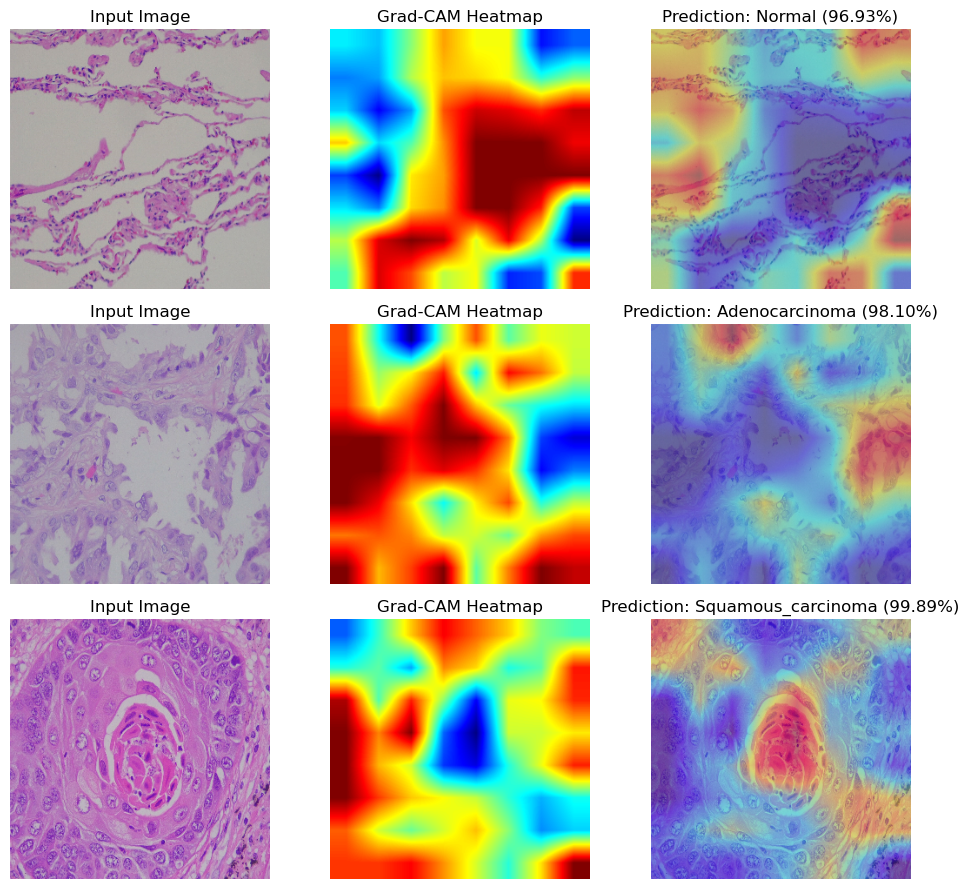


🔥 **Grad-CAM Color Explanation**:
- **🔴 Red Areas** → Most critical for classification (high activation)
- **🟠 Orange/Yellow Areas** → Moderately important
- **🟢 Green/Blue Areas** → Less relevant



In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input

# ---- Load trained model ----
model_path = "InceptionResNetV2 + Gru_lungMOdel.keras"
model = tf.keras.models.load_model(model_path)

# ---- Define class labels ----
class_labels = ['Adenocarcinoma', 'Normal', 'Squamous_carcinoma']

# ---- Define Color Descriptions ----
color_description = """
🔥 **Grad-CAM Color Explanation**:
- **🔴 Red Areas** → Most critical for classification (high activation)
- **🟠 Orange/Yellow Areas** → Moderately important
- **🟢 Green/Blue Areas** → Less relevant
"""

# ---- List of image paths ----
image_paths = [
    r"D:\Lung_cancer\test\Nor\nor_20x_903.jpg",
    r"D:\Lung_cancer\test\Adenocarcinoma\aca_bd_40x_202.jpg" ,
    r"D:\Lung_cancer\train\Squamous_carcinoma\scc_bd_40x_80.jpg"
   ]

# ---- Grad-CAM Implementation ----
def generate_grad_cam(image_path, model, layer_name="conv_7b"):
    """ Generate Grad-CAM heatmap for an image """
    # Load and preprocess image
    img = image.load_img(image_path, target_size=(299, 299))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Get model prediction
    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_labels[predicted_index]
    confidence = np.max(predictions) * 100

    # Grad-CAM logic
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(layer_name).output, model.output])
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, predicted_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs.numpy()[0]
    pooled_grads = pooled_grads.numpy()

    for i in range(conv_outputs.shape[-1]):  
        conv_outputs[:, :, i] *= pooled_grads[i]  

    heatmap = np.mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    # Load original image
    original_img = cv2.imread(image_path)
    original_img = cv2.resize(original_img, (299, 299))
    heatmap = cv2.resize(heatmap, (299, 299))

    # Convert heatmap to color
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Overlay heatmap on original image
    superimposed_img = cv2.addWeighted(original_img, 0.6, heatmap, 0.4, 0)

    return original_img, heatmap, superimposed_img, predicted_class_name, confidence

# ---- Process Multiple Images & Display ----
num_images = len(image_paths)
plt.figure(figsize=(10, 3 * num_images))

for i, img_path in enumerate(image_paths):
    original, heatmap, superimposed, pred_class, conf = generate_grad_cam(img_path, model)

    plt.subplot(num_images, 3, i * 3 + 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title("Input Image")
    plt.axis("off")

    plt.subplot(num_images, 3, i * 3 + 2)
    plt.imshow(heatmap, cmap="jet")
    plt.title("Grad-CAM Heatmap")
    plt.axis("off")

    plt.subplot(num_images, 3, i * 3 + 3)
    plt.imshow(cv2.cvtColor(superimposed, cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {pred_class} ({conf:.2f}%)")
    plt.axis("off")

plt.tight_layout()
plt.show()

# ---- Print Color Explanation ----
print(color_description)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


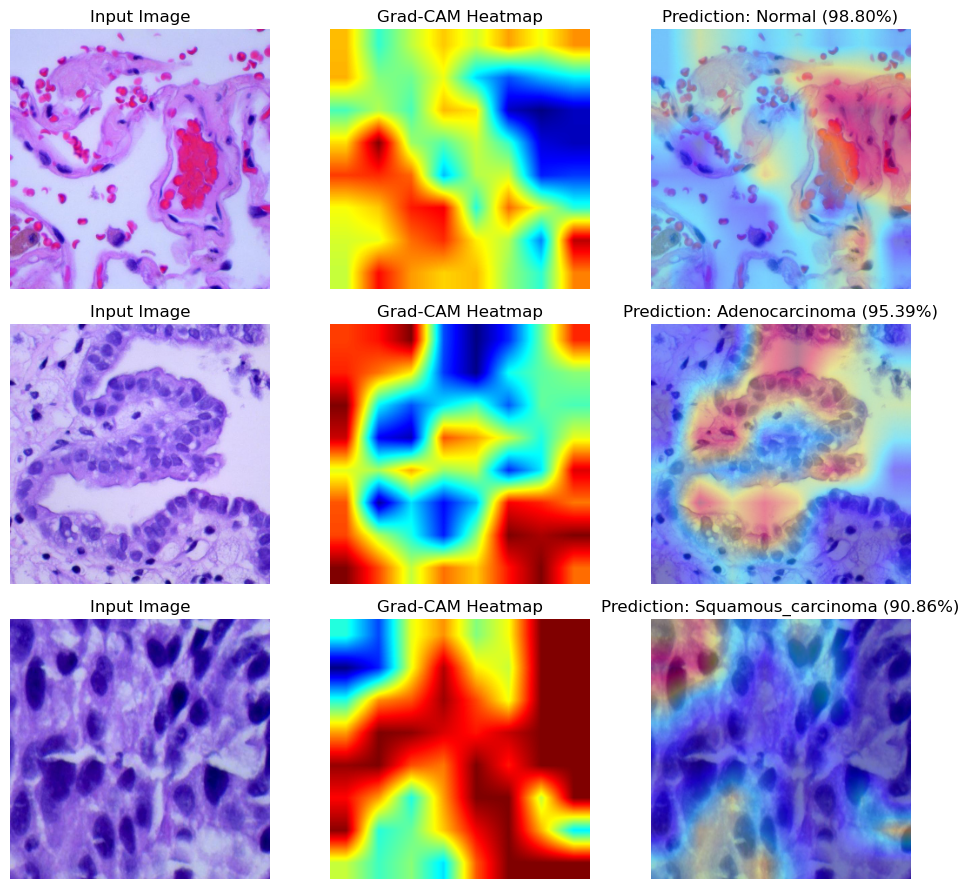


🔥 **Grad-CAM Color Explanation**:
- **🔴 Red Areas** → Most critical for classification (high activation)
- **🟠 Orange/Yellow Areas** → Moderately important
- **🟢 Green/Blue Areas** → Less relevant



In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input

# ---- Load trained model ----
model_path = "InceptionResNetV2 + Gru_lungMOdel.keras"
model = tf.keras.models.load_model(model_path)

# ---- Define class labels ----
class_labels = ['Adenocarcinoma', 'Normal', 'Squamous_carcinoma']

# ---- Define Color Descriptions ----
color_description = """
🔥 **Grad-CAM Color Explanation**:
- **🔴 Red Areas** → Most critical for classification (high activation)
- **🟠 Orange/Yellow Areas** → Moderately important
- **🟢 Green/Blue Areas** → Less relevant
"""

# ---- List of image paths ----
image_paths = [
    r"D:\Lung_cancer\LC25000_sampled\Nor\lungn116.jpeg",
    r"D:\Lung_cancer\LC25000_sampled\Adenocarcinoma\lungaca52.jpeg" ,
    r"D:\Lung_cancer\LC25000_sampled\Squamous_carcinoma\lungscc51.jpeg"
   ]

# ---- Grad-CAM Implementation ----
def generate_grad_cam(image_path, model, layer_name="conv_7b"):
    """ Generate Grad-CAM heatmap for an image """
    # Load and preprocess image
    img = image.load_img(image_path, target_size=(299, 299))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Get model prediction
    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_labels[predicted_index]
    confidence = np.max(predictions) * 100

    # Grad-CAM logic
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(layer_name).output, model.output])
    
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, predicted_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs.numpy()[0]
    pooled_grads = pooled_grads.numpy()

    for i in range(conv_outputs.shape[-1]):  
        conv_outputs[:, :, i] *= pooled_grads[i]  

    heatmap = np.mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    # Load original image
    original_img = cv2.imread(image_path)
    original_img = cv2.resize(original_img, (299, 299))
    heatmap = cv2.resize(heatmap, (299, 299))

    # Convert heatmap to color
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Overlay heatmap on original image
    superimposed_img = cv2.addWeighted(original_img, 0.6, heatmap, 0.4, 0)

    return original_img, heatmap, superimposed_img, predicted_class_name, confidence

# ---- Process Multiple Images & Display ----
num_images = len(image_paths)
plt.figure(figsize=(10, 3 * num_images))

for i, img_path in enumerate(image_paths):
    original, heatmap, superimposed, pred_class, conf = generate_grad_cam(img_path, model)

    plt.subplot(num_images, 3, i * 3 + 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title("Input Image")
    plt.axis("off")

    plt.subplot(num_images, 3, i * 3 + 2)
    plt.imshow(heatmap, cmap="jet")
    plt.title("Grad-CAM Heatmap")
    plt.axis("off")

    plt.subplot(num_images, 3, i * 3 + 3)
    plt.imshow(cv2.cvtColor(superimposed, cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {pred_class} ({conf:.2f}%)")
    plt.axis("off")

plt.tight_layout()
plt.show()

# ---- Print Color Explanation ----
print(color_description)


In [46]:
import os
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input

# 🔹 Load the trained model
model = load_model("InceptionResNetV2 + Gru_lungMOdel.keras")

# 🔹 Define class labels
class_labels = {0: "Adenocarcinoma", 1: "Nor", 2: "Squamous_carcinoma"}

# 🔹 Function to preprocess an image
def preprocess_image(image_path, target_size=(299, 299)):
    try:
        img = cv2.imread(image_path)
        if img is None:
            raise ValueError(f"Error loading image: {image_path}")

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, target_size)
        img = preprocess_input(img)  # ✅ Use correct preprocessing for InceptionResNetV2
        img = np.expand_dims(img, axis=0)  # ✅ Expand dims for batch input
        return img
    except Exception as e:
        print(f"⚠️ Skipping {image_path} due to error: {e}")
        return None

# 🔹 Function to predict all images in a folder
def predict_folder(folder_path):
    correct = 0
    total = 0

    for class_name in os.listdir(folder_path):  
        class_path = os.path.join(folder_path, class_name)
        if not os.path.isdir(class_path):
            continue 
        
        for img_name in os.listdir(class_path):  
            img_path = os.path.join(class_path, img_name)
            img = preprocess_image(img_path)
            if img is None:
                continue  # Skip this image if there's an error

            prediction = model.predict(img, verbose=0)  # Suppress per-image output
            predicted_class = np.argmax(prediction, axis=1)[0]
            predicted_label = class_labels[predicted_class]

            # ✅ Check if prediction matches folder name
            if predicted_label.lower() == class_name.lower():
                correct += 1
            total += 1

    # 🔹 Print Summary
    accuracy = (correct / total) * 100 if total > 0 else 0
    print("\n📊 Prediction Summary:")
    print(f"📌 Total Images: {total}")
    print(f"✅ Correct Predictions: {correct}")
    print(f"❌ Incorrect Predictions: {total - correct}")
    print(f"🎯 Accuracy: {accuracy:.2f}%")

# 🔹 Run Batch Prediction
folder_path = r"D:\Lung_cancer\LC25000_sampled"
predict_folder(folder_path)


📊 Prediction Summary:
📌 Total Images: 1500
✅ Correct Predictions: 1185
❌ Incorrect Predictions: 315
🎯 Accuracy: 79.00%


In [48]:
import os
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input

# 🔹 Load the trained model
model = load_model("InceptionResNetV2 + Gru_lungMOdel.keras")

# 🔹 Define class labels
class_labels = {0: "Adenocarcinoma", 1: "Nor", 2: "Squamous_carcinoma"}

# 🔹 Function to preprocess an image
def preprocess_image(image_path, target_size=(299, 299)):
    try:
        img = cv2.imread(image_path)
        if img is None:
            raise ValueError(f"Error loading image: {image_path}")

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, target_size)
        img = preprocess_input(img)  # ✅ Use correct preprocessing for InceptionResNetV2
        img = np.expand_dims(img, axis=0)  # ✅ Expand dims for batch input
        return img
    except Exception as e:
        print(f"⚠️ Skipping {image_path} due to error: {e}")
        return None

# 🔹 Function to predict all images in a folder
def predict_folder(folder_path):
    correct = 0
    total = 0

    for class_name in os.listdir(folder_path):  
        class_path = os.path.join(folder_path, class_name)
        if not os.path.isdir(class_path):
            continue 
        
        for img_name in os.listdir(class_path):  
            img_path = os.path.join(class_path, img_name)
            img = preprocess_image(img_path)
            if img is None:
                continue  # Skip this image if there's an error

            prediction = model.predict(img, verbose=0)  # Suppress per-image output
            predicted_class = np.argmax(prediction, axis=1)[0]
            predicted_label = class_labels[predicted_class]

            # ✅ Check if prediction matches folder name
            if predicted_label.lower() == class_name.lower():
                correct += 1
            total += 1

    # 🔹 Print Summary
    accuracy = (correct / total) * 100 if total > 0 else 0
    print("\n📊 Prediction Summary:")
    print(f"📌 Total Images: {total}")
    print(f"✅ Correct Predictions: {correct}")
    print(f"❌ Incorrect Predictions: {total - correct}")
    print(f"🎯 Accuracy: {accuracy:.2f}%")

# 🔹 Run Batch Prediction
folder_path = r"D:\Lung_cancer\train"
predict_folder(folder_path)


📊 Prediction Summary:
📌 Total Images: 406
✅ Correct Predictions: 367
❌ Incorrect Predictions: 39
🎯 Accuracy: 90.39%


In [50]:
import os
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input

# 🔹 Load the trained model
model = load_model("InceptionResNetV2 + Gru_lungMOdel.keras")

# 🔹 Define class labels
class_labels = {0: "Adenocarcinoma", 1: "Nor", 2: "Squamous_carcinoma"}

# 🔹 Function to preprocess an image
def preprocess_image(image_path, target_size=(299, 299)):
    try:
        img = cv2.imread(image_path)
        if img is None:
            raise ValueError(f"Error loading image: {image_path}")

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, target_size)
        img = preprocess_input(img)  # ✅ Use correct preprocessing for InceptionResNetV2
        img = np.expand_dims(img, axis=0)  # ✅ Expand dims for batch input
        return img
    except Exception as e:
        print(f"⚠️ Skipping {image_path} due to error: {e}")
        return None

# 🔹 Function to predict all images in a folder
def predict_folder(folder_path):
    correct = 0
    total = 0

    for class_name in os.listdir(folder_path):  
        class_path = os.path.join(folder_path, class_name)
        if not os.path.isdir(class_path):
            continue 
        
        for img_name in os.listdir(class_path):  
            img_path = os.path.join(class_path, img_name)
            img = preprocess_image(img_path)
            if img is None:
                continue  # Skip this image if there's an error

            prediction = model.predict(img, verbose=0)  # Suppress per-image output
            predicted_class = np.argmax(prediction, axis=1)[0]
            predicted_label = class_labels[predicted_class]

            # ✅ Check if prediction matches folder name
            if predicted_label.lower() == class_name.lower():
                correct += 1
            total += 1

    # 🔹 Print Summary
    accuracy = (correct / total) * 100 if total > 0 else 0
    print("\n📊 Prediction Summary:")
    print(f"📌 Total Images: {total}")
    print(f"✅ Correct Predictions: {correct}")
    print(f"❌ Incorrect Predictions: {total - correct}")
    print(f"🎯 Accuracy: {accuracy:.2f}%")

# 🔹 Run Batch Prediction
folder_path = r"D:\Lung_cancer\test"
predict_folder(folder_path)


📊 Prediction Summary:
📌 Total Images: 103
✅ Correct Predictions: 83
❌ Incorrect Predictions: 20
🎯 Accuracy: 80.58%
